# Previsão de resistência à compressão de concreto usando aprendizado de máquina

![image](https://www.dsigners.net/wp-content/uploads/2019/10/image1.jpg)

Determinar a resistência à compressão do concreto implica a determinar a qualidade do concreto, normalmente para se obter a medida dessa resistência é realizado um teste de laboratório em que um equipamento mede essa resistência.

>Os problemas nesses testes são normalmente:
>
>   * O tempo de espera para a cura do material coletado que é por volta de 28 dias;
>   * A probabilidade de erro humano durante o processo.
    
Uma forma de amenizar esses problemas é tentando atravéz de uma combinação de várias simulações digitais utilizando dados já obtidos de resistência tentar prever qual seria a resistência final em uma situação real para o menor tempo possivel utilizando algoritmos de aprendizado de máquina.

## Análise, limpeza e pré-processamento dos dados

In [63]:
# Importando biblioteca pandas para leitura dos dados
import pandas as pd
import numpy as np

#importando dataset
df = pd.read_csv('Concrete_Data.csv')

#imprimindo dataset
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Descrição dos dados utilizados:

Este dataset contém 1030 itens com 9 classes de atributos e como vamos verificar mas na frente não possui valores nulos ou faltantes (_nullvalues, missigin_values_), ele possui 8 atributos de entrada para a o algoritmo e 1 de saida que no caso é :

`Concrete compressive strenght(Mpa,megapascals)`. 

Sete dos valores são medidos em kg/m3 (Kilogramas por metro cúbico) o tempo de cura são representado em dias e a nossa variável target ou seja a variável que desejamos obter está em (MPa -- Mega Pascal).

### Rearranjo de nomes das colunas : Traduzindo o dataset

In [64]:
# Imprimindo o nome das colunas em inglês
df.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [65]:
#Alterando o nome das colunas:
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"Cimento(kg/m3)",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Brita(kg/m3)",
                   "Fly Ash (component 3)(kg in a m^3 mixture)":"Cinzas Volante(kg/m3)",
                   "Water  (component 4)(kg in a m^3 mixture)":"Agua(kg/m3)",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplastificante(kg/m3)",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Agregado Grosso(kg/m3)",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Agregado Fino(kg/m3)",
                   "Age (day)":"Idade(dias)",
                   "Concrete compressive strength(MPa, megapascals) ":"Resistencia a Compressao do Concreto(MPa)"},
         inplace=True)

Este passo apesar de simples é importante pois facilita muito na hora de trabalhar com os dados.

In [66]:
# Verificando dados nulos
missing = df.isnull().sum()
print(missing)


Cimento(kg/m3)                               0
Brita(kg/m3)                                 0
Cinzas Volante(kg/m3)                        0
Agua(kg/m3)                                  0
Superplastificante(kg/m3)                    0
Agregado Grosso(kg/m3)                       0
Agregado Fino(kg/m3)                         0
Idade(dias)                                  0
Resistencia a Compressao do Concreto(MPa)    0
dtype: int64


Como dito anteriormente os dados não possuem nenhum item faltante.


In [67]:
# Verificando o dtype de casa coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cimento(kg/m3)                             1030 non-null   float64
 1   Brita(kg/m3)                               1030 non-null   float64
 2   Cinzas Volante(kg/m3)                      1030 non-null   float64
 3   Agua(kg/m3)                                1030 non-null   float64
 4   Superplastificante(kg/m3)                  1030 non-null   float64
 5   Agregado Grosso(kg/m3)                     1030 non-null   float64
 6   Agregado Fino(kg/m3)                       1030 non-null   float64
 7   Idade(dias)                                1030 non-null   int64  
 8   Resistencia a Compressao do Concreto(MPa)  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Análise exploratória dos dados

O primeiro passo é analisar os dados no modo geral para obter insights antes mesmo de gerar qualquer modelo.

A primeira análise geral é a de correlação dos dados, essa análise nos ajuda a entender como os dados estão relacionados com cada feature(classes de variáveis).

Para entender melhor o coeficiente de correlação classifica as features entre si e retorna uma valor entre **-1 e 1**, e quanto mais proxima de zero menos relação há entre as duas variáveis.

![image2](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500)

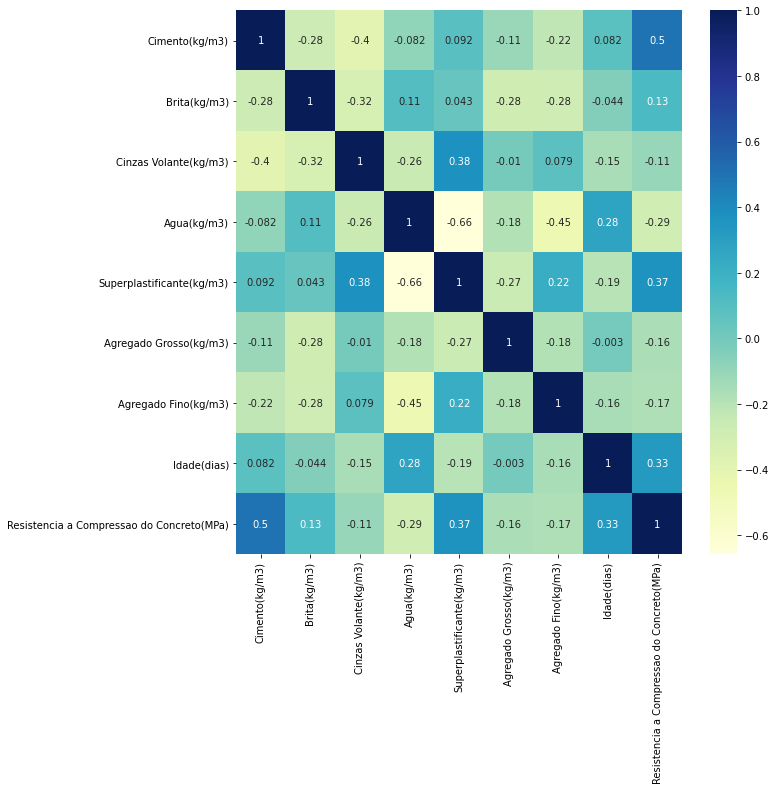

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

Nesse gráfico podemos observar uma alta correlação positiva entre concreto e a resistencia a compressão do concreto, oque de fato está correto, a resistencia realmente aumenta com o aumento de cimento.

> Se verificarmos na literatura o traço do concreto é fortemente influenciado pela combinação de cimento, areia brita e água.

O superplastificante também possui uma correlação positiva forte justamente por sua utilização ser para dar uma resistência maior,  diminuindo a quantidade de água no concreto.

>"Os aditivos superplastificantes são utilizados na mistura com o concreto para diminuir a quantidade de água, aumentando a sua resistência e fluidez.
>
>Quanto maior a quantidade de água aplicada ao concreto, menos resistente ele terá, o que poderá ocasionar fissuras que aparecerão durante o endurecimento da estrutura".
                                 

Oque justifica a correlação negativa forte da água em relação a resistencia a compressão do concreto.

## Representação visual de cada correlação.

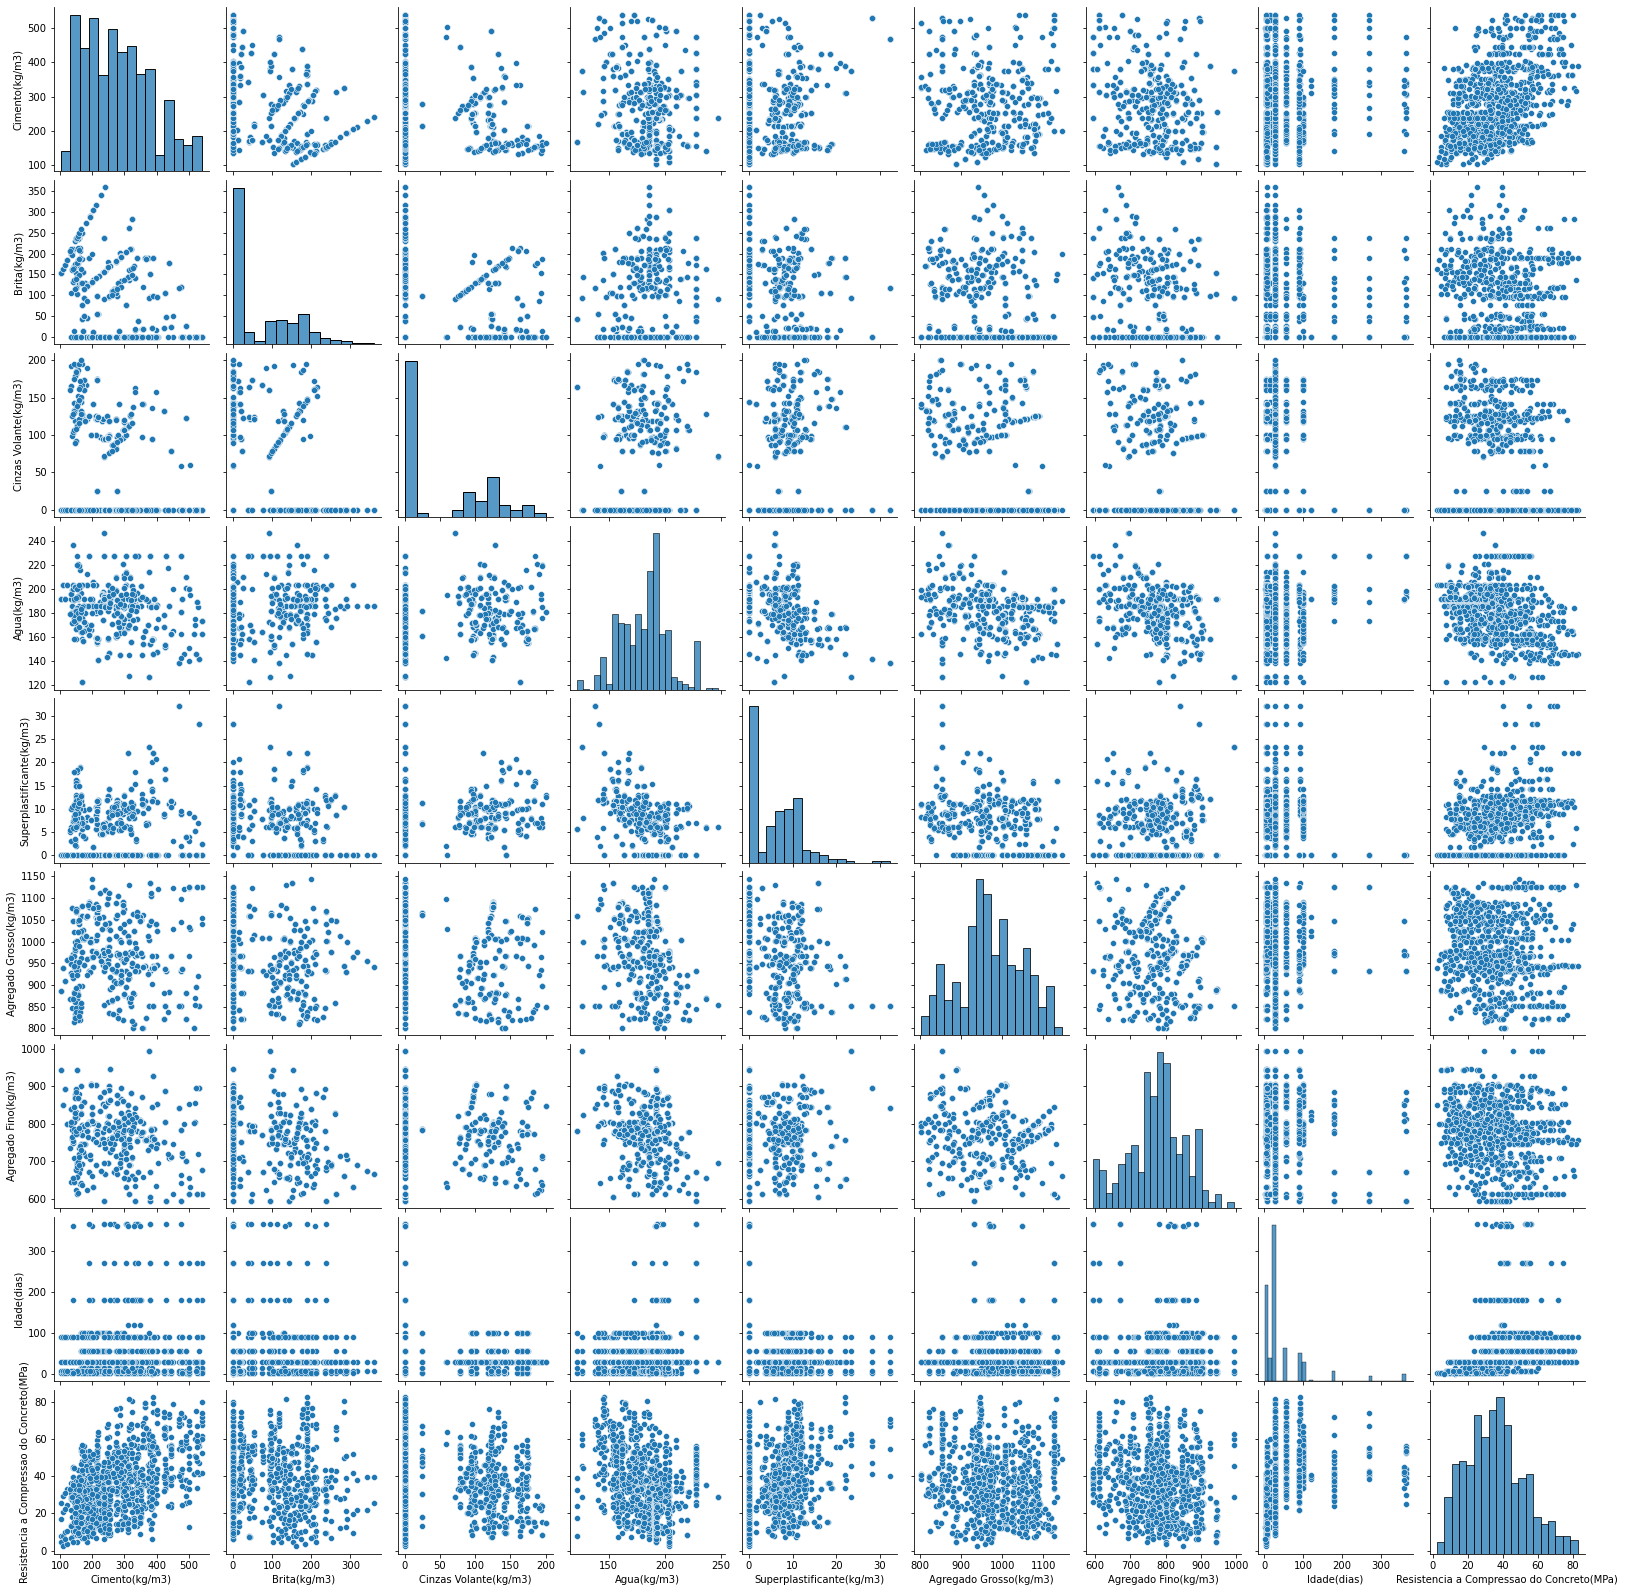

In [69]:
# Visualizando dados da variável target
df['Resistencia a Compressao do Concreto(MPa)'].describe()

corr_ = sns.pairplot(df)

## Verificando Outliers


### Oque são os Outliers?

Em poucas palavras outliers são os pontos que se distanciam muito dentro dos conjunto de valores.

Esses outliers podem acabar causando um desequilibrio nos resultados obtidos.


In [110]:
# Verificando para cada uma das colunas
nome_colunas = ["Cimento(kg/m3)","Brita(kg/m3)","Cinzas Volante(kg/m3)",
                "Agua(kg/m3)","Superplastificante(kg/m3)",
                "Agregado Grosso(kg/m3)","Agregado Fino(kg/m3)",
                "Idade(dias)","Resistencia a Compressao do Concreto(MPa)"]

def boxplot_plot(dataset_name, nome_colunas):
    df = dataset_name
    for colunas in nome_colunas:
        df.boxplot(column=colunas)
        plt.show()


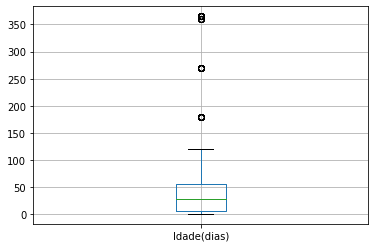

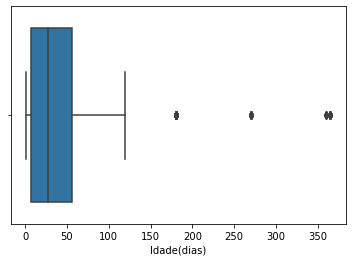

In [71]:
df.boxplot(column=nome_colunas[7])
plt.show()

ax = sns.boxplot(x=df["Idade(dias)"])

O concreto, a partir de estudos, atinge a resistência máxima aos 28 dias logo para eliminar esses outliers vamos remover os dados que contenham resistencias com mais de 30 dias.


> REFERÊNCIA BIBLIOGRÁFICA: YAZIGI, Walid. A Técnica de Edificar – Editora Pini - 14ª Ed - Páginas 263 e 264.

In [89]:
seq_val = np.arange(10,350,20)

results = []
for values in seq_val:
    new_df = df.loc[df["Idade(dias)"] <= values]
    results.append(new_df["Resistencia a Compressao do Concreto(MPa)"].mean())

for value, result in zip(seq_val, results):
    print(f'Idade: {value} dias  -->  Médias de Resistencia: {result:.2f} MPa ')

Idade: 10 dias  -->  Médias de Resistencia: 22.31 MPa 
Idade: 30 dias  -->  Médias de Resistencia: 31.04 MPa 
Idade: 50 dias  -->  Médias de Resistencia: 31.04 MPa 
Idade: 70 dias  -->  Médias de Resistencia: 33.29 MPa 
Idade: 90 dias  -->  Médias de Resistencia: 33.73 MPa 
Idade: 110 dias  -->  Médias de Resistencia: 35.30 MPa 
Idade: 130 dias  -->  Médias de Resistencia: 35.31 MPa 
Idade: 150 dias  -->  Médias de Resistencia: 35.31 MPa 
Idade: 170 dias  -->  Médias de Resistencia: 35.31 MPa 
Idade: 190 dias  -->  Médias de Resistencia: 35.48 MPa 
Idade: 210 dias  -->  Médias de Resistencia: 35.48 MPa 
Idade: 230 dias  -->  Médias de Resistencia: 35.48 MPa 
Idade: 250 dias  -->  Médias de Resistencia: 35.48 MPa 
Idade: 270 dias  -->  Médias de Resistencia: 35.68 MPa 
Idade: 290 dias  -->  Médias de Resistencia: 35.68 MPa 
Idade: 310 dias  -->  Médias de Resistencia: 35.68 MPa 
Idade: 330 dias  -->  Médias de Resistencia: 35.68 MPa 


<AxesSubplot:>

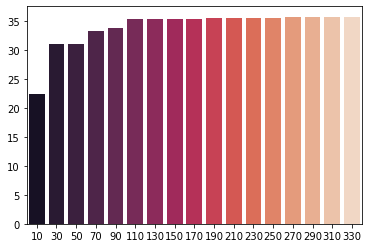

In [90]:
def sequential(x, y1):
    plot = sns.barplot(x=x, y=y1, palette="rocket")
    return plot

sequential(seq_val, results)

(749, 9)

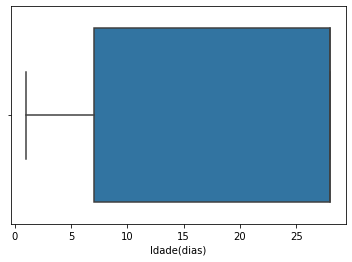

In [125]:
# Novo dataset com a delimitação de até 100 dias
new_df = df.loc[df["Idade(dias)"] <= 29]

ax = sns.boxplot(x=new_df["Idade(dias)"])
new_df.shape


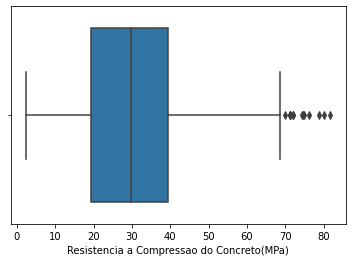

In [126]:
ax1 = sns.boxplot(x=new_df["Resistencia a Compressao do Concreto(MPa)"])

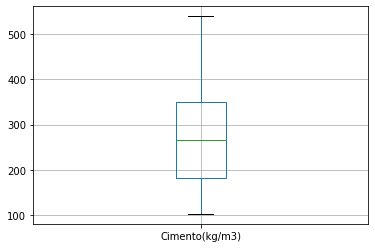

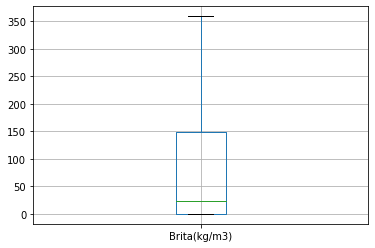

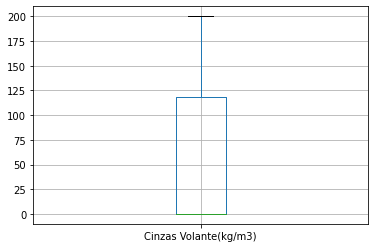

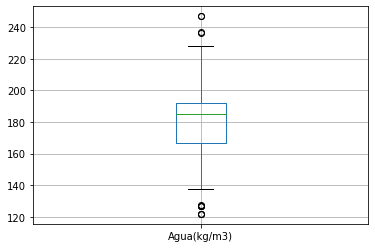

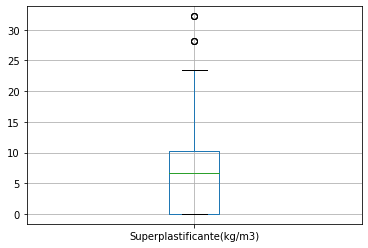

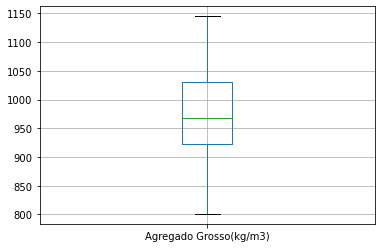

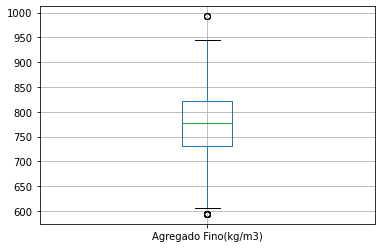

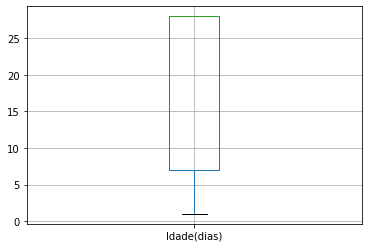

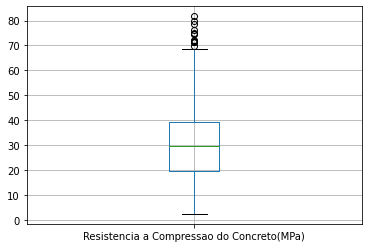

In [127]:
# Verificano outliers com a nova delimitação de dados:
boxplot_plot(new_df, nome_colunas)

# Encontrando o melhor modelo

Modelos Utilizados:

* Regressão Linear;
* Regressão Ridge;
* Regressão Lasso;
* Regressão Elastic Net.

In [130]:
df1 = new_df
df1.head()

,Cimento(kg/m3),Brita(kg/m3),Cinzas Volante(kg/m3),Agua(kg/m3),Superplastificante(kg/m3),Agregado Grosso(kg/m3),Agregado Fino(kg/m3),Idade(dias),Resistencia a Compressao do Concreto(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [131]:
# Dividindo as variáveis em treino e variavel target:

y = df1['Resistencia a Compressao do Concreto(MPa)']
x = df1.drop('Resistencia a Compressao do Concreto(MPa)', axis=1)

In [174]:
# Regressão Linear

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# Instanciando valores de predições realizadas nos dados de teste:
#y_train_pred = modelo.predict(x_treino) 

y_test_pred = modelo.predict(x_teste) 

r2_teste = r2_score(y_teste, y_test_pred)
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_test_pred))

print(f'Coef R2 (Linear): {r2_teste}')
print(f'RMSE (linear): {rmse_teste}')



       

Coef R2 (Linear): 0.8008760433291513
RMSE (linear): 6.9931146427546365


caso deseje verificar os valores para os dados de treino utilize:

`y_test_pred = modelo.predict(x_treino)`.

Essa situação é interessante pois assim é possivel verificar se não houve um overfitting aos dados de treino.

In [173]:
# Regressão Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definindo os valores de alpha a serem avaliados
variation = np.arange(1, 370)
param={'alpha':variation}

# Instanciando a função do modelo a ser utilizado
ModeloRidge = Ridge()
grid = GridSearchCV(ModeloRidge, param_grid=param, cv=5, scoring="r2")

# Dandos fit aos dados para encontrar o melhor valor de alpha
ModeloRidge.fit(x_treino, y_treino)

# Obtendo o melhor valor de alpha
hyp_rid = grid.fit(x_treino, y_treino)
hyp_rid.best_params_

# Inserindo o valor obtido de alpha e dando fit aos dados
rid = Ridge(alpha=hyp_rid.best_params_['alpha'])
rid.fit(x_treino, y_treino)

# Obtendo os resultados
y_test_pred = rid.predict(x_teste) 
r2_teste = r2_score(y_teste, y_test_pred)
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_test_pred))

# Imprimindo os resultados
print(f'Coef R2 (RIDGE): {r2_teste}')
print(f'RMSE (RIDGE): {rmse_teste}')


Coef R2 (RIDGE): 0.7873546218294721
RMSE (RIDGE): 7.501638992316254
